In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import numpy as np

In [2]:
import librosa

In [3]:
data, sampling_rate = librosa.load('./test/100059573609216054.mp3')

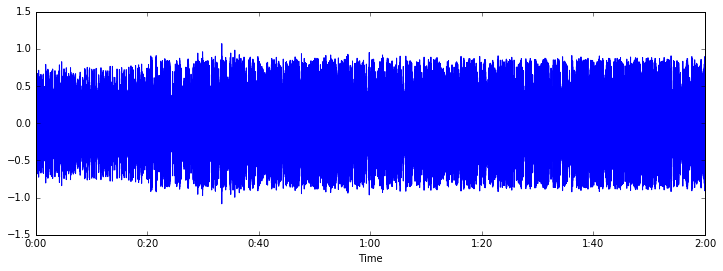

In [4]:
import librosa.display
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [5]:
filename = './test/100059573609216054.mp3'
X, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 

In [6]:
mfccs.shape


(40,)

In [7]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
#     chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
#     mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
#     contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
#     tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
#     sr=sample_rate).T,axis=0)
#     return mfccs,chroma,mel,contrast,tonnetz
    return mfccs

In [10]:
%%time
# mfccs, chroma, mel, contrast, tonnetz = extract_feature(filename)
mfccs = extract_feature(filename)

CPU times: user 6.61 s, sys: 135 ms, total: 6.74 s
Wall time: 6.7 s


In [9]:
print mfccs
print np.shape(mfccs)

[ -4.09191573e+01   7.80051282e+01   2.86513033e+00   2.97546833e+01
  -1.62585810e+00   1.43841207e+01   2.64833133e+00   2.12979628e+00
   5.93800098e+00   2.03179016e+00  -3.31067055e+00   1.82276871e-01
  -3.46291345e+00   2.50755354e+00  -2.70473062e+00   4.44057655e+00
   3.47890119e+00   9.95379527e+00   3.59501655e-03   6.63568045e+00
  -4.20976699e+00   2.39896489e+00   8.76450879e-01   1.97845538e+00
   2.09864721e-01   2.74325543e+00  -2.79442817e+00   2.81415058e+00
  -5.14728597e+00   2.62636978e+00   4.46706199e-01   2.01536804e+00
  -3.09386557e-01   2.46706787e+00  -1.35086881e-02   4.84745708e+00
  -1.94220498e+00   3.47971237e+00  -5.23257668e+00  -2.56230124e+00]
(40,)


In [11]:
# def writeDown(datas,folder, idx = 0):
#     for i, feature in enumerate(['mfccs', 'chroma', 'mel', 'contrast', 'tonnetz']):
#         with open('/Users/zellist/Documents/zaloai/%s_%d_%s'%(folder,idx,feature), 'w')as f:
#             for k, v in datas.items():
#                 f.write('%s :'%(k))
#                 for n in v[i]:
#                     f.write('%f '%(n))
#                 f.write('\n')
def writeDown(datas,folder, idx = 0):
    feature='mfccs'
    with open('/Users/zellist/Documents/zaloai/%s_%d_%s'%(folder,idx,feature), 'w')as f:
        for k, v in datas.items():
            f.write('%s :'%(k))
            for n in v:
                f.write('%f '%(n))
            f.write('\n')

In [ ]:
import glob


for folder in ['train','test']:
    _folder = '/Users/zellist/Documents/zaloai/%s/*.mp3'%(folder)
    cnt=0
    datas = {}
    allmp3s = glob.glob(_folder)
    for mi, mp3 in enumerate(allmp3s):
        try:
            print '\r %d / %d %s'%(mi,len(allmp3s),mp3),
            filename = os.path.basename(mp3)
            datas[filename]= (extract_feature(mp3))        
        except : continue
        if len(datas)==50:
            writeDown(datas, folder, cnt)
            cnt+=1
            datas = {}
    writeDown(datas,folder,cnt)
    
            

 2 / 5158 /Users/zellist/Documents/zaloai/train/1014929727811186294.mp3